In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_main = pd.read_hdf('../../data/processed/solicitacoes156.h5', key='data', format="table")
df_socio = pd.read_hdf('../../data/processed/socioeconomico.h5', key='data', format="table")

In [3]:
df_socio.head()

,BAIRRO,RPA,MICROREGIAO,DIST_MARCO_ZERO,HECTARES,HABITANTES,NUM_HOMENS,POR_HOMENS,NUM_MULHERES,POR_MULHERES,...,PARDA,AMARELA,INDIGENA,ALFABETIZADOS,CRESCIMENTO_ANUAL,DENSIDADE,DOMICILIOS,MEDIA_MORADORES,MULHERES_RESPONSAVEIS,RENDA
0,RECIFE,1,1.1,0.00,270.0,602,287,47.67,315,52.33,...,30.72,0.50,0.50,81.7,-4.20,2.23,198,3.0,66.83,567.00
1,BOA VISTA,1,1.2,2.78,176.0,14778,6164,41.71,8614,58.29,...,33.37,1.25,0.26,98.0,0.52,84.15,5999,2.4,54.43,3618.45
2,CABANGA,1,1.2,3.26,81.0,1551,679,43.78,872,56.22,...,45.13,1.35,0.32,94.0,0.10,19.16,506,3.1,57.00,1986.08
3,COELHOS,1,1.3,2.15,43.0,7633,3571,46.78,4062,53.22,...,53.36,0.86,0.72,87.0,1.12,178.51,2322,3.6,53.63,898.41
4,ILHA DO LEITE,1,1.2,2.64,26.0,1007,446,4.29,561,55.71,...,33.86,1.49,0.40,96.0,0.49,38.21,361,2.8,56.79,3024.11


In [4]:
df_socio.columns

Index(['BAIRRO', 'RPA', 'MICROREGIAO', 'DIST_MARCO_ZERO', 'HECTARES',
       'HABITANTES', 'NUM_HOMENS', 'POR_HOMENS', 'NUM_MULHERES',
       'POR_MULHERES', '0_4ANOS', '0_4ANOS%', '5_14ANOS', '5_14ANOS%',
       '15_17ANOS', '15_17ANOS%', '18_24ANOS', '18_24ANOS%', '25_59ANOS',
       '25_59ANOS%', '60_ANOS', '60_ANOS%', 'BRANCA', 'PRETA', 'PARDA',
       'AMARELA', 'INDIGENA', 'ALFABETIZADOS', 'CRESCIMENTO_ANUAL',
       'DENSIDADE', 'DOMICILIOS', 'MEDIA_MORADORES', 'MULHERES_RESPONSAVEIS',
       'RENDA'],
      dtype='object')

#### O dataset de perfil socioeconomico é a primeira informação externa a ser utilizada no enriquecimentos dos dados. E possui as colunas vistas acima. Desses dados, o únicos que não possuiem representatividade, ou seja, que não agrega informação útil são os dados de RPA, MICROREGIAO, DIST_MARCO_ZERO.

In [16]:
df_socio.drop(["RPA","MICROREGIAO","DIST_MARCO_ZERO"],axis = 1, inplace = True)

##### Para saber mais sobre os dados e o perfil socioeconomico vamos fazer uma análise vais detalhada desses dados.

* Primeiramente, vamos análisar alguns dados simples, como a amplitude de renda, ou seja, a diferença entre os que ganham mais e ganham menos, bem como o desvio padrão desses valores

In [8]:
amplitude = df_socio.RENDA.max() - df_socio.RENDA.min()
print(amplitude)

10772.79


##### Esse valor, apesar de ser obtido de forma simples, revela uma desigualdade absurda. A diferença  entre a renda do bairro mais rico e do mais pobre é de 10772,79 reais. Quando temos em mente que o calculo de renda utilizado pelo senso e disponibilizado pela prefeitura, é o da renda média, essa diferença se torna ainda mais gritante.

In [9]:
desvio = df_socio.RENDA.std()
print(desvio)

2659.8160252327307


##### Valores altos para o desvio padrão significa que os dados estão bastant dispersos (desigualdade), uma vez que essa medida representao quanto os dados estão afastados da media.

* Apesar de não ser o foco dessa análise, vale a pena verificar a correlação entre elementos já conhecidos por serem decisivos na renda e na qualidade de vida das pessoas.

In [10]:
df_socio[["ALFABETIZADOS", "RENDA"]].corr()

,ALFABETIZADOS,RENDA
ALFABETIZADOS,1.000000,0.665981
RENDA,0.665981,1.000000


In [92]:
df_socio[['CRESCIMENTO_ANUAL','DENSIDADE', 'DOMICILIOS', 'MEDIA_MORADORES','ALFABETIZADOS','RENDA']].corr()['RENDA']

CRESCIMENTO_ANUAL    0.106767
DENSIDADE           -0.115106
DOMICILIOS          -0.051503
MEDIA_MORADORES     -0.279802
ALFABETIZADOS        0.665981
RENDA                1.000000
Name: RENDA, dtype: float64

In [91]:
df_socio[['RENDA', 'POR_HOMENS', 'POR_MULHERES']].corr()['RENDA']

RENDA           1.000000
POR_HOMENS     -0.218535
POR_MULHERES    0.412997
Name: RENDA, dtype: float64

In [90]:
df_socio[['0_4ANOS%','5_14ANOS%','15_17ANOS%', '18_24ANOS%',
       '25_59ANOS%', '60_ANOS%','ALFABETIZADOS','RENDA']].corr()['RENDA']

0_4ANOS%        -0.504302
5_14ANOS%       -0.612101
15_17ANOS%      -0.630153
18_24ANOS%      -0.263413
25_59ANOS%       0.298585
60_ANOS%         0.649331
ALFABETIZADOS    0.665981
RENDA            1.000000
Name: RENDA, dtype: float64

#### Apesar da correlação indicar uma relação entre 2 valores, isso não quer dizer necessáriamente que essa relação existe de fato. Para o exemplos mostrados acima pode-se fazer alguns comentarios.
 * Uma relação forte, mais proxima de 1, entre renda e a porcentagem de alfabetizados é uma relação que faz sentido e tende a ser verdadeira, visto que níveis mais elevados e educação propiciam melhores ganhos, consequentimente aumento de renda.
 * Existe uma relação mais fraca entre renda e crecimento anual da população. Essa relação pode ser mais fraca devido ao fato de que o crescimento populacional não impacta a curto prazo a renda media do local.
 * Ao analisar a renda com a porcentagem de homem e mulheres, vemos um impacto das mulheres na renda um tanto significativo.
 * Já para o porcentagem por faixa de idade, temos um fato curioso. A renda e a taxa de alfabetizados, tem relação apenas para a faixa entre 25 e 60 anos. O que indica que melhores condições de vida, como bons ganhos e uma educação básica, podem influenciar na longevidade de uma população.

### Agora que já foi feita uma breve análise sobre os dados socioeconomicos, vamos seguir com o desenvolvimento da hipotese, e verificar se existe relação do perfil socioeconomico do bairro com o tipo de solicitação. Como os dados socioeconomicos são são agrupados por Bairro, faz sentido agrupar os dados do dataset principal por bairro.

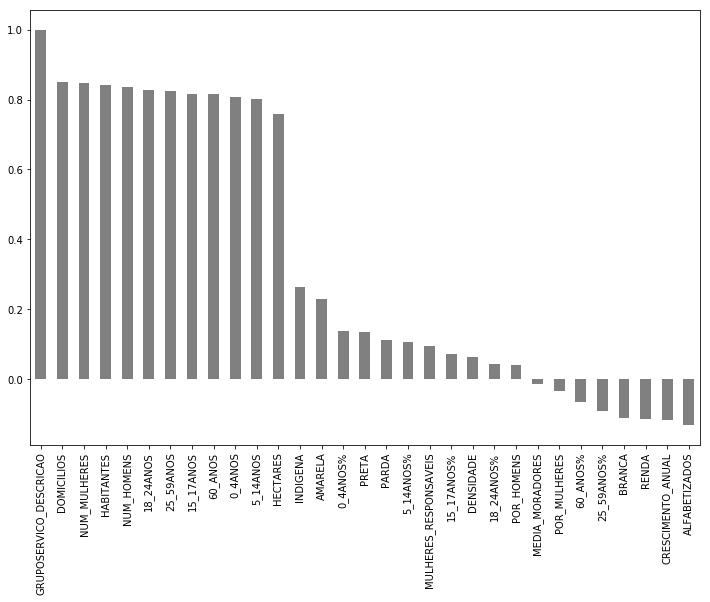

In [28]:
df_bairro = df_main.groupby("BAIRRO").agg({'GRUPOSERVICO_DESCRICAO': 'count'})
df_merged = df_bairro.merge(df_socio, on="BAIRRO")

df_merged.corr("spearman")['GRUPOSERVICO_DESCRICAO'].sort_values(ascending=False).plot(kind='bar',figsize=(12,8), legend=False, color='grey')

#### Considerando uma boa relação, aquelas que apresentam valores de 50%, pode-se notar que a quantidade de solicitações tem relação com todas as colunas que dizem respeito, ou se relacionam com a quantidade de habitante do bairro. Um fato importante a ser falado é que o número de solicitações não possui uma relação com a renda do bairro.

In [58]:
df_serv = pd.get_dummies(df_main['GRUPOSERVICO_DESCRICAO'])
columns = df_serv.columns
df_serv_merged = pd.concat([df_main,df_serv],axis=1).drop('GRUPOSERVICO_DESCRICAO',axis=1)

In [68]:
df_hypothese = df_serv_merged.groupby("BAIRRO")[columns].agg(sum)

In [70]:
df_hypothese_socio = pd.merge(df_hypothese,df_socio,on="BAIRRO")

In [95]:
df_corr = df_hypothese_socio.corr('spearman')['RENDA']
df_corr = df_corr[columns].sort_values(ascending=False)

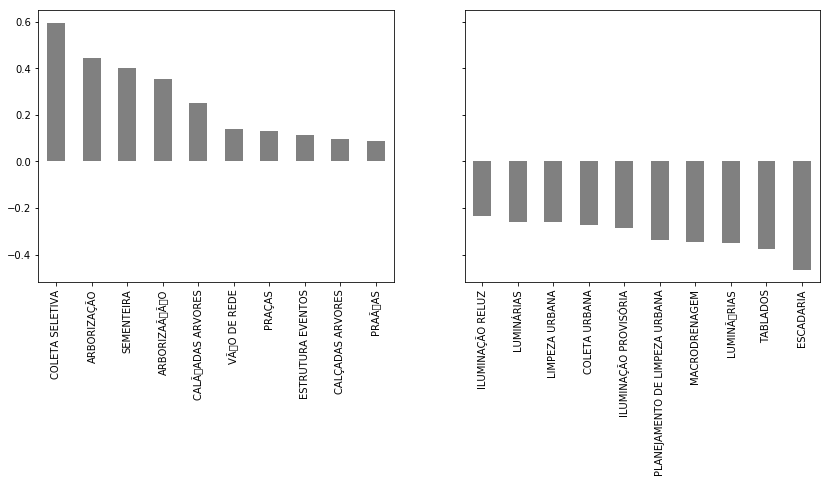

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
ax = df_corr[:10].plot(kind='bar',figsize=(14,5), legend=False, color='grey',ax=axes[0])
ax = df_corr[-10:].plot(kind='bar',figsize=(14,5), legend=False, color='grey',ax=axes[1])

##### Com a correlações encontradas, não é possível verificar um relação forte entre a renda do bairro , e questões sociais com o tipo de solicitação feita. Esse fato pode ser observado no gráfico geografico encontrado no Tableau. Podemos notar, que os tipos de solicitação estão bem dispostos entre os diferentes bairros do Recife. Não havendo uma aglomeração especifica que permita identificar